In [4]:
# Import necessary libraries 
import cv2
import pytesseract
import re
import matplotlib.pyplot as plt

In [5]:
# Specify the input image path
image_path = r"input_image_path"  # Replace with your image path

# Load the image
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    raise ValueError("Failed to load image. Check the file path and format.")


In [6]:
# Preprocess the image for better OCR results
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding to remove noise
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Median blur to reduce noise further
processed_image = cv2.medianBlur(thresh, 3)


In [7]:
# Perform OCR
custom_config = r'--oem 3 --psm 6'  # Optimal settings for extracting text from blocks

text = pytesseract.image_to_string(processed_image, config=custom_config)


In [31]:
# Clean the extracted text
def clean_ingredient_text(raw_text):
    # List of words/phrases to remove
    unwanted_words = ["Ingredients", "Contents", "Key ingredients", "Directions", "How to use"]

    # Remove unwanted words/phrases (case-insensitive)
    for word in unwanted_words:
        raw_text = re.sub(rf"\b{word}\b", "", raw_text, flags=re.IGNORECASE)

    # Merge words split across lines (e.g., "Frag-\nment" -> "Fragment")
    raw_text = re.sub(r"(\w+)-\s*\n\s*(\w+)", r"\1\2", raw_text)

    # Handle accidental merging without a space (e.g., "word\nAnotherWord" -> "word AnotherWord")
    raw_text = re.sub(r"(\w+)\n(\w+)", r"\1 \2", raw_text)

    # Remove unnecessary symbols (keep only letters and spaces)
    raw_text = re.sub(r"[^a-zA-Z ]", "", raw_text)

    # Remove extra spaces
    cleaned_text = re.sub(r"\s+", " ", raw_text).strip()

    return cleaned_text


In [32]:
ingredient_list = clean_ingredient_text(text)

# Print the cleaned ingredient list
print(ingredient_list)

Aqua Papaya Carica Papaya Extract Sodiur laureth Sulphate Vitamin E Coco BetaineSodium Cocoyl Isethionate Sodium Benzoate EDTA Frgarnce


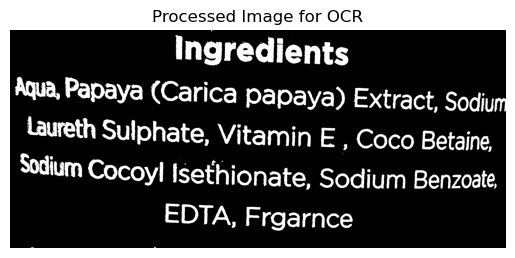

In [33]:
# Optional: Display the processed image
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image for OCR")
plt.axis("off")
plt.show()